In [78]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
os.chdir("C:/Users/gulte/Desktop/AI Exercises/Challenge_2")

In [4]:
df_raw = pd.read_excel("brainBodyWeight.xlsx",sep=" ",header=None)

In [5]:
x = df_raw.loc[1].tolist()[0].split(" ")

In [6]:
y = [a for a in x if a!=""]

In [7]:
y

['2', '0.480', '15.500']

In [8]:
df_s = pd.DataFrame(columns=["Index","BrainWeight","BodyWeight"])

In [9]:
cols = ["Index","BrainWeight","BodyWeight"]

In [10]:
df_raw.shape[0]

62

In [11]:
for i in range(df_raw.shape[0]):
    x = df_raw.loc[i].tolist()[0].split(" ")
    y = [a for a in x if a!=""]
    y = pd.Series(y,index = cols)
    df_s = df_s.append(y,ignore_index=True)

In [83]:
df_s.set_index(df_s.columns[0])

,BrainWeight,BodyWeight
Index,,
1,3.385,44.500
2,0.480,15.500
3,1.350,8.100
4,465.000,423.000
5,36.330,119.500
...,...,...
58,160.000,169.000
59,0.900,2.600
60,1.620,11.400


In [109]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_s.iloc[:,1:])

In [110]:
df1 = pd.DataFrame(scaled,columns = cols[1:])

In [111]:
df = pd.concat([df_s.iloc[:,0],df1],axis=1)

In [112]:
df = df.set_index("Index")

In [113]:
df

,BrainWeight,BodyWeight
Index,,
1,-0.219094,-0.258613
2,-0.222351,-0.290041
3,-0.221376,-0.298061
4,0.298483,0.151576
5,-0.182155,-0.177334
...,...,...
58,-0.043493,-0.123690
59,-0.221880,-0.304021
60,-0.221073,-0.294484


In [114]:
testX = df.iloc[:10,:1]
testY = df.iloc[:10,1:]

In [115]:
testX

,BrainWeight
Index,
1,-0.219094
2,-0.222351
3,-0.221376
4,0.298483
5,-0.182155
6,-0.191876
7,-0.206262
8,-0.221723
9,-0.218191


In [116]:
testY

,BodyWeight
Index,
1,-0.258613
2,-0.290041
3,-0.298061
4,0.151576
5,-0.177334
6,-0.182211
7,-0.200417
8,-0.300878
9,-0.243983


In [117]:
df.iloc[:10]

,BrainWeight,BodyWeight
Index,,
1,-0.219094,-0.258613
2,-0.222351,-0.290041
3,-0.221376,-0.298061
4,0.298483,0.151576
5,-0.182155,-0.177334
6,-0.191876,-0.182211
7,-0.206262,-0.200417
8,-0.221723,-0.300878
9,-0.218191,-0.243983


In [118]:
trainX = df.iloc[10:,:1]
trainY = df.iloc[10:,1:]

In [127]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 11 to 62
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BrainWeight  52 non-null     float64
dtypes: float64(1)
memory usage: 832.0+ bytes


In [120]:
linreg = LinearRegression()

In [121]:
res = linreg.fit(trainY,trainX)

In [122]:
bW_pred = res.predict(testX)

In [123]:
bW_pred

array([[-0.21171999],
       [-0.21476561],
       [-0.2138535 ],
       [ 0.27224016],
       [-0.17718024],
       [-0.18626992],
       [-0.19972098],
       [-0.2141785 ],
       [-0.21087602],
       [-0.21482327]])

In [124]:
print("Coefficients: \n", linreg.coef_)

Coefficients: 
 [[0.93504987]]


In [136]:
print("Mean squared error:",mean_squared_error(testY, bW_pred))

Mean squared error: 0.004538450123790163


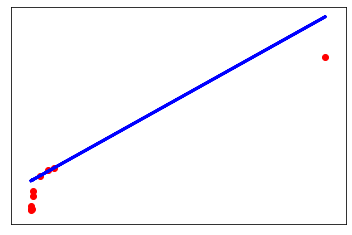

In [134]:
plt.scatter(testX,testY,color="red")
plt.plot(testX, bW_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

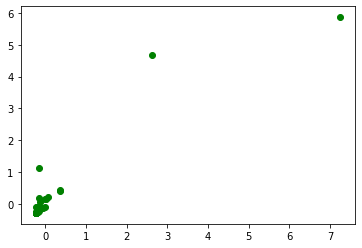

In [82]:
plt.scatter(trainX,trainY,color="green")